<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Banco de dados 

O objetivo deste exercício é analisar um conjunto de dados composto por informações de 400 portadores de cartão de crédito e compreender quais fatores influenciam a Fatura do Cartão de Crédito de um portador de cartão e prever a fatura média de um determinado indivíduo. 

Os resultados da análise podem determinar quais clientes apresentam risco de inadimplência de crédito ou qual será o comportamento esperado do consumidor de clientes em potencial. Além disso, combinar os dados de fatura do cartão de crédito com informações como Limite de crédito pode ajudar no cálculo da utilização de crédito de um cartão.

 ## Descrição do conjunto de dados
 
Este conjunto de dados faz parte de "An Introduction to Statistical Learning with Applications in R" disponível em https://www.statlearning.com/resources-second-edition

O banco de dados contém 400 observações com as seguintes variáveis:

* ID - Identificação
* Income - Renda em milhares de dólares $ 1.000
* Limit - Limite de crédito
* Rating - Classificação de crédito
* Cards - Número de cartões de crédito
* Age - Idade em anos
* Education - número de anos de estudo
* Own - Possui casa? Sim ou Não
* Student - Sim ou Não
* Married - Sim ou Não
* Region -  Leste, Sul e Oeste indicando a localização geográfica do indivíduo
* Balance - Fatura média do cartão de crédito em \$

**O objetivo é determinar quais fatores influenciam a Fatura do cartão de crédito de um determinado indivíduo.**

* As seguintes suposições sobre o conjunto de dados foram feitas:

* A fatura de cartão de crédito refere-se a fatura média mensal de todos os cartões de propriedade de um titular. Esta suposição foi feita em função da variável cartões que se refere ao número de cartões de crédito que uma pessoa possui e tem apenas um valor de fatura associado.

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [10]:
credit_df = pd.read_csv("Credit.csv")
credit_df.head(10)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
5,80.180,8047,569,4,77,10,No,No,No,South,1151
6,20.996,3388,259,2,37,12,Yes,No,No,East,203
7,71.408,7114,512,2,87,9,No,No,No,West,872
8,15.125,3300,266,5,66,13,Yes,No,No,South,279
9,71.061,6819,491,3,41,19,Yes,Yes,Yes,East,1350


In [11]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [12]:
credit_df.Own = credit_df.Own.astype('category')
credit_df.Student = credit_df.Student.astype('category')
credit_df.Married = credit_df.Married.astype('category')
credit_df.Region = credit_df.Region.astype('category')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Income     400 non-null    float64 
 1   Limit      400 non-null    int64   
 2   Rating     400 non-null    int64   
 3   Cards      400 non-null    int64   
 4   Age        400 non-null    int64   
 5   Education  400 non-null    int64   
 6   Own        400 non-null    category
 7   Student    400 non-null    category
 8   Married    400 non-null    category
 9   Region     400 non-null    category
 10  Balance    400 non-null    int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 24.1 KB


In [13]:
credit_df.describe().round(2)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


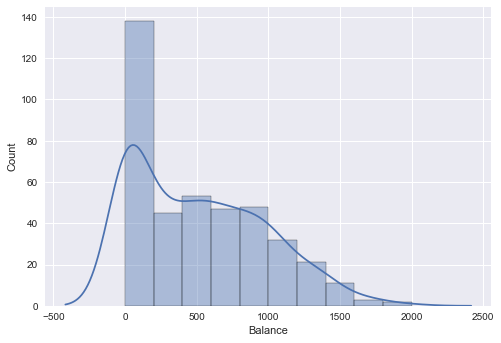

In [14]:
sns.histplot(credit_df.Balance, alpha=0.4, kde=True, kde_kws={"cut": 3});

Como empresa de cartão de crédito, podemos estar interessados em conhecer a fatura média de nossos usuários frequentes (por exemplo, para identificar aqueles em risco de inadimplência), e as faturas iguais a zero podem distorcer nossos resultados.

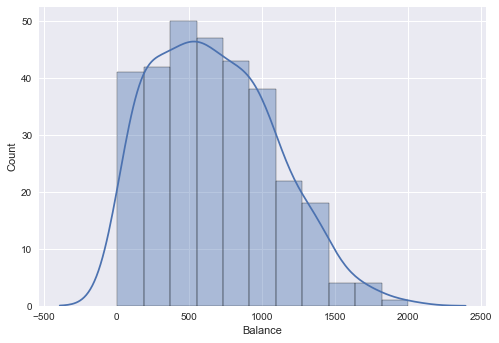

In [15]:
credit = credit_df.query('Balance > 0')
sns.histplot(credit.Balance, alpha=0.4, kde=True, kde_kws={"cut": 3});

In [16]:
credit[["Balance","Limit"]]

,Balance,Limit
0,333,3606
1,903,6645
2,580,7075
3,964,9504
4,331,4897
...,...,...
394,734,5758
395,560,4100
396,480,3838
397,138,4171


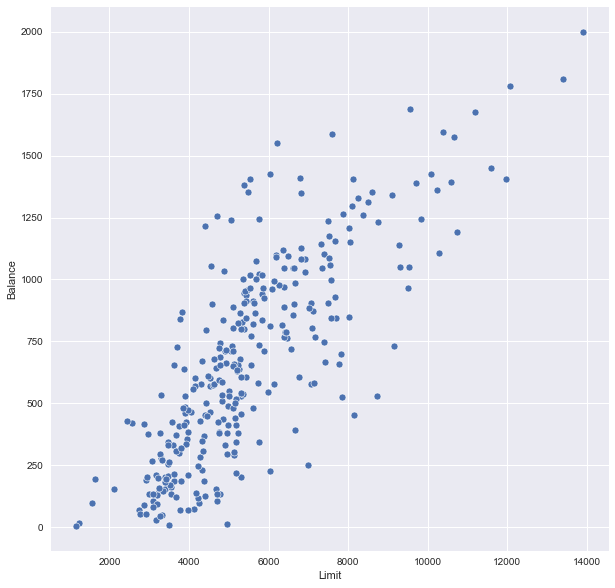

In [17]:
# Criando o ambiente do gráfico 
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="Limit", y="Balance", data=credit);

In [18]:
credit[['Balance','Limit']].corr()

,Balance,Limit
Balance,1.000000,0.795757
Limit,0.795757,1.000000


# Regressão linear simples

### **Vamos criar um modelo para tentar explicar essa relação**
   Um modelo linear explica a relação entre variáveis ​​dependentes (Y) e variáveis ​​independentes (X). O chapéu nos betas significa apenas que são valores estimados a partir de dados (e esperamos que sejam próximo dos valores verdadeiros).

$$\hat{Y} = \hat{\beta}_{0} + \hat{\beta_1}X_{i} + \epsilon $$

$$\hat{Balance} = \hat{\beta}_{0} + \hat{\beta_1}Limit_{i} + \epsilon $$

In [19]:
# Construção do modelo

import statsmodels.formula.api as smf

modelo_ls1 = smf.ols(formula = 'Balance ~ Limit', data=credit).fit()
modelo_ls1.summary() #Duas formas de ver o resultado 
#print(modelo_ls1.summary()) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     531.8
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           4.71e-69
Time:                        10:56:57   Log-Likelihood:                -2151.8
No. Observations:                 310   AIC:                             4308.
Df Residuals:                     308   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -209.2924     40.750     -5.136      0.000    -289.476    -129.109
Limit          0.1605      0.007     23.060      0.000       0.147       0.174
==============================================================================
Omnibus:                        8.813   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.619
Skew:                           0.313   Prob(JB):                      0.00815
Kurtosis:                       3.595   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As medidas mais importantes para nós neste momento são:
* R-squared = $R^2$
* A estatística de teste F (F-statistic) e p-valor dessa estatística (Prob (F-statistic))
* Coeficientes (coef) e teste de hipotese dos coeficientes (P>|t|)

O $R^2$ ajustado nos dá uma medida de porcentagem da variância explicada pelo modelo. Este modelo tem um poder explicativo de 63%, ou seja, o limite do cartão explica 63% da fatura. O restante do que falta explicar é atribuído ao termo do erro, ou seja, todas as outras coisas que tem influência sobre nossa variável resposta mas que não estão no modelo ou não podem de alguma forma ser mensuradas 

A estatística de teste F e seu p-valor nos mostram que esse modelo é estatisticamente válido (testa o modelo atual contra o modelo sem nenhuma variavel explicativa). 

Para testar os coeficientes olhamos para o valor-p (P >|t|). Se esse p-valor é menor que 0.05 (ou 0.01 ou 0.1) os coeficientes são estatisticamente significativos.

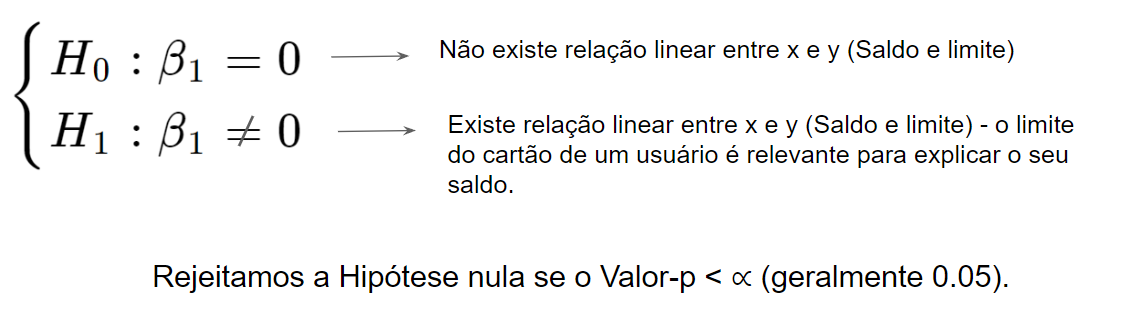


### Interpretação

* O aumento de uma unidade no limite de crédito (1 dolar), aumentamos em média 0.1605 no Balance (Fatura)


In [20]:
# Construção do modelo

import statsmodels.formula.api as smf

modelo_ls2 = smf.ols(formula = 'Balance ~ Student ', data=credit).fit()
modelo_ls2.summary() #Duas formas de ver o resultado 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     14.15
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           0.000202
Time:                        10:57:01   Log-Likelihood:                -2300.4
No. Observations:                 310   AIC:                             4605.
Df Residuals:                     308   BIC:                             4612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        638.1292     24.624     25.915      0.000     589.676     686.582
Student[T.Yes]   261.1785     69.424      3.762      0.000     124.573     397.784
==============================================================================
Omnibus:                        8.061   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.357
Skew:                           0.390   Prob(JB):                       0.0153
Kurtosis:                       2.807   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretação

* Em média, estudantes tem um balance 261 maior do que não estudantes. 

# Regressão linear múltipla


In [21]:
credit.select_dtypes(include=['int64', 'float64']).corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.833706,0.830651,-0.040318,0.227115,-0.032540,0.414373
Limit,0.833706,1.000000,0.996091,-0.022540,0.164160,-0.031583,0.795757
Rating,0.830651,0.996091,1.000000,0.024991,0.167269,-0.040466,0.798441
Cards,-0.040318,-0.022540,0.024991,1.000000,0.020615,-0.087351,0.074416
Age,0.227115,0.164160,0.167269,0.020615,1.000000,0.023899,0.008343
Education,-0.032540,-0.031583,-0.040466,-0.087351,0.023899,1.000000,0.001001
Balance,0.414373,0.795757,0.798441,0.074416,0.008343,0.001001,1.000000


In [22]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(credit.Balance, credit.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))
r2, p2 = pearsonr(credit.Balance, credit.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))
r3, p3 = pearsonr(credit.Balance, credit.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))
r4, p4 = pearsonr(credit.Limit, credit.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))
r5, p5 = pearsonr(credit.Limit, credit.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))
r6, p6 = pearsonr(credit.Rating, credit.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

Correlation coefficient Balance-Limit: 0.7957566036735191
 p-value: 4.70576878110861e-69

Correlation coefficient Balance-Rating: 0.7984412858332923
 p-value: 7.693855612803947e-70

Correlation coefficient Balance-Income: 0.4143730924095732
 p-value: 2.715794360780412e-14

Correlation coefficient Limit-Rating: 0.9960906396302969
 p-value: 0.0

Correlation coefficient Limit-Income: 0.8337062154210724
 p-value: 2.0108326426806027e-81

Correlation coefficient Rating-Income: 0.8306510962437925
 p-value: 2.5764022024925853e-80



In [24]:
corr = credit.select_dtypes(include=['int64', 'float64']).corr() 
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .format(precision = 2))

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,nan,nan,nan,nan,nan,nan,nan
Limit,0.83,nan,nan,nan,nan,nan,nan
Rating,0.83,1.00,nan,nan,nan,nan,nan
Cards,-0.04,-0.02,0.02,nan,nan,nan,nan
Age,0.23,0.16,0.17,0.02,nan,nan,nan
Education,-0.03,-0.03,-0.04,-0.09,0.02,nan,nan
Balance,0.41,0.80,0.80,0.07,0.01,0.00,nan


In [25]:
credit.describe(include=['category'])

,Own,Student,Married,Region
count,310,310,310,310
unique,2,2,2,3
top,Yes,No,Yes,South
freq,165,271,192,158


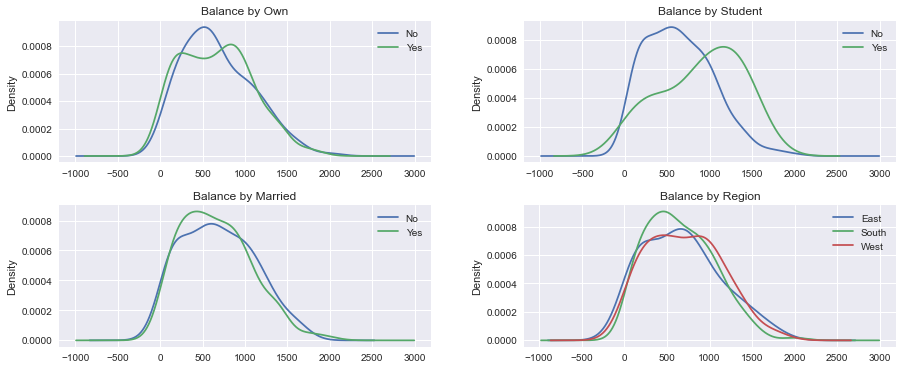

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit.groupby('Own').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Own')
credit.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit.groupby('Region').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Region');

O estudante parece ser o único preditor a influenciar a distribuição do Balance.

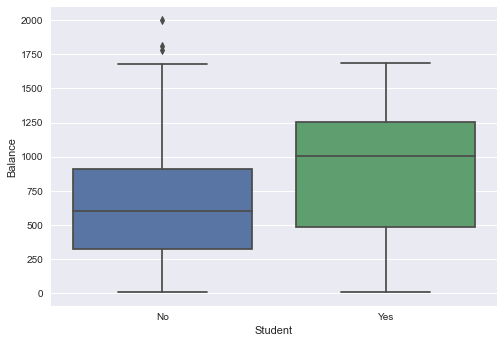

In [27]:
sns.boxplot(x='Student', y='Balance', data = credit);

Os estudantes exibem, em média, Faturas de cartão de crédito mais altos. Podemos pensar que os estudantes têm uma maior necessidade de financiamento devido aos empréstimos estudantis ou que eles tendem a ter menos controle sobre suas finanças.


In [28]:
modelo_ls3 = smf.ols('Balance ~ Limit + Income + Rating + Cards + Age + Education + Own + Student + Married + Region', data = credit).fit()
modelo_ls3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.366e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:59:24   Log-Likelihood:                -1162.5
No. Observations:                 310   AIC:                             2349.
Df Residuals:                     298   BIC:                             2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -696.9077      4.412   -157.956      0.000    -705.590    -688.225
Own[T.Yes]          0.2332      1.200      0.194      0.846      -2.129       2.596
Student[T.Yes]    500.8310      1.880    266.464      0.000     497.132     504.530
Married[T.Yes]     -2.0625      1.261     -1.636      0.103      -4.543       0.418
Region[T.South]    -0.0700      1.467     -0.048      0.962      -2.956       2.816
Region[T.West]     -1.3785      1.731     -0.796      0.426      -4.784       2.027
Limit               0.3360      0.004     84.135      0.000       0.328       0.344
Income             -9.9916      0.029   -339.458      0.000     -10.050      -9.934
Rating             -0.1433      0.059     -2.428      0.016      -0.259      -0.027
Cards              25.4764      0.500     50.962      0.000      24.493      26.460
Age                -1.0029      0.036    -28.215      0.000      -1.073      -0.933
Education          -0.0080      0.189     -0.042      0.966      -0.381       0.365
==============================================================================
Omnibus:                        3.799   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.766
Skew:                          -0.269   Prob(JB):                        0.152
Kurtosis:                       2.963   Cond. No.                     4.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Income (Renda), Rating (Classificação de crédito) e Limit (limite) são altamente correlacionados.  Inserir todas essas váriaveis no meu modelo acarreta em problemas de multicolinearidade. 

In [29]:
modelo_ls4 = smf.ols('Balance ~ Income + Cards + Age + Student ', data = credit).fit()
modelo_ls4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     23.55
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           5.54e-17
Time:                        10:59:26   Log-Likelihood:                -2265.6
No. Observations:                 310   AIC:                             4541.
Df Residuals:                     305   BIC:                             4560.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        426.4449     83.327      5.118      0.000     262.476     590.413
Student[T.Yes]   272.2596     62.412      4.362      0.000     149.447     395.072
Income             4.8377      0.562      8.605      0.000       3.731       5.944
Cards             28.9772     14.544      1.992      0.047       0.359      57.596
Age               -2.1280      1.227     -1.734      0.084      -4.543       0.287
==============================================================================
Omnibus:                       45.470   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.727
Skew:                          -0.042   Prob(JB):                      0.00284
Kurtosis:                       2.051   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
modelo_ls5 = smf.ols('Balance ~ Limit + Cards + Age + Student', data = credit).fit()
modelo_ls5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     239.2
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.04e-92
Time:                        10:59:27   Log-Likelihood:                -2087.2
No. Observations:                 310   AIC:                             4184.
Df Residuals:                     305   BIC:                             4203.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -252.6496     53.429     -4.729      0.000    -357.785    -147.514
Student[T.Yes]   398.6916     35.386     11.267      0.000     329.059     468.324
Limit              0.1735      0.006     29.887      0.000       0.162       0.185
Cards             30.4315      8.175      3.723      0.000      14.346      46.517
Age               -3.0441      0.681     -4.468      0.000      -4.385      -1.703
==============================================================================
Omnibus:                        8.394   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.699
Skew:                          -0.408   Prob(JB):                       0.0129
Kurtosis:                       2.911   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
modelo_ls6 = smf.ols('Balance ~ Limit  + Age + Student', data = credit).fit()
modelo_ls6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     301.7
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           4.74e-91
Time:                        10:59:28   Log-Likelihood:                -2094.1
No. Observations:                 310   AIC:                             4196.
Df Residuals:                     306   BIC:                             4211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -160.8979     48.390     -3.325      0.001    -256.117     -65.679
Student[T.Yes]   394.7980     36.106     10.934      0.000     323.750     465.846
Limit              0.1728      0.006     29.182      0.000       0.161       0.184
Age               -2.9817      0.695     -4.288      0.000      -4.350      -1.614
==============================================================================
Omnibus:                        6.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.393
Skew:                          -0.340   Prob(JB):                       0.0409
Kurtosis:                       2.818   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
modelo_ls7 = smf.ols('Balance ~  Cards + Age + Student ', data = credit).fit()
modelo_ls7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.421
Date:                Mon, 18 Apr 2022   Prob (F-statistic):            0.00120
Time:                        10:59:28   Log-Likelihood:                -2299.3
No. Observations:                 310   AIC:                             4607.
Df Residuals:                     306   BIC:                             4622.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        552.9194     91.287      6.057      0.000     373.290     732.548
Student[T.Yes]   264.1486     69.455      3.803      0.000     127.479     400.818
Cards             23.1456     16.169      1.431      0.153      -8.671      54.962
Age                0.2783      1.330      0.209      0.834      -2.339       2.896
==============================================================================
Omnibus:                        7.182   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.370
Skew:                           0.360   Prob(JB):                       0.0251
Kurtosis:                       2.773   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

https://www.kaggle.com/code/suzanaiacob/predicting-credit-card-balance-using-regression/notebook